In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop

# 02402 may 2024

## Question and Solution Translation to Python by Khalid

Exercise I to IV: 

No translation needed for the questions- but scroll down to find solutions with Python by Pernille

#### Exercise I

In [ ]:
#Question I.1 (1)

# Define variables
x_bar = 17
mu = 18
s = 4.5
n = 48

# Calculate t_observed
tobs = (x_bar - mu) / (s / np.sqrt(n))
print(tobs)

# Calculate Critical Values
df=47
critical_value = stats.t.ppf([0.025, 0.975], df)
print(critical_value)

-1.539600717839002
[-2.01174051  2.01174051]


In [ ]:
#Question I.2 (2)

# Define variables
n = 45
tobs = -1.74
alpha = 0.05

# Print tobs
print("Test statistic:", tobs)  # Output: -1.74

# Calculate the p-value
p_value = (1 - stats.t.cdf(np.abs(tobs), df=n-1)) * 2

# Round the p-value to 4 decimal places
p_value_rounded = np.round(p_value, 4)

print("p-value:", p_value_rounded)

if p_value_rounded < alpha:
    print("Reject Null Hypothesis")
else:
    print("We do not reject the null hypothesis")


Test statistic: -1.74
p-value: 0.0889
We do not reject the null hypothesis


#### Questions II.1 (3)

**Method 3.19 Confidence interval for the variance/standard deviation**

A $100(1-\alpha)\%$ confidence interval for the variance $\sigma^2$ is

$
\left[ \frac{(n-1)s^2}{\chi^2_{1-\alpha/2}}, \frac{(n-1)s^2}{\chi^2_{\alpha/2}} \right],
$

where the quantiles come from a $\chi^2$-distribution with $\nu = n-1$ degrees of freedom.

A $100(1-\alpha)\%$ confidence interval for the standard deviation $\sigma$ is

$
\left[ \sqrt{\frac{(n-1)s^2}{\chi^2_{1-\alpha/2}}}, \sqrt{\frac{(n-1)s^2}{\chi^2_{\alpha/2}}} \right].
$


In [18]:
## The confidence interval for the standard deviation

# Define variables
n = 30
s = 0.09
alpha = 0.05

# Calculate numerator
numerator = (n - 1) * s**2

# Confidence interval for standard deviation
interval = [
    np.sqrt(numerator / stats.chi2.ppf(1 - alpha / 2, df=n - 1)),
    np.sqrt(numerator / stats.chi2.ppf(alpha / 2, df=n - 1))
]

# Round the interval to 3 decimal places
interval_rounded = np.round(interval, 3)

# Print the result
print(interval_rounded)

[0.072 0.121]


#### Question III.1 (4)

P (X < 3) = 0.17 + 0.22 + 0.28 = 0.67


#### Question III.2 (5)

The formula for the sample variance ($s^2$) is:

$
s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2
$

Where:
- $n$ = number of observations
- $x_i$ = each individual observation
- $\bar{x}$ = sample mean (average of all observations)

This formula divides by $n-1$ instead of $n$ to account for **Bessel's correction**, making it an unbiased estimate of the population variance.

In [ ]:
# Question III.2 (5)

import numpy as np

# Define values
x = np.array([0, 1, 2, 4])
f = np.array([0.17, 0.22, 0.28, 0.33])

# Mean
mean = np.sum(x * f)
print("Mean:", mean)

# Variance
variance = np.sum((x - mean)**2 * f)
print("Variance:", variance)

Mean: 2.1
Variance: 2.21


#### Question IV.1 (6)

The overall average concentration found across all four locations is 252.5
The average concentration in location 1 is 250.0
The estimate of the effect of Location 1 is found as the difference between the group mean and the overall mean:

$\hat{\alpha}_1 = 250.0 - 252.5 = -2.5$

#### Question IV.2 (7) What is the estimate of the error standard deviation?

Consider the following Table shown in Chapter 8

**ANOVA Table**

| **Source of Variation** | **Degrees of Freedom** | **Sums of Squares**       | **Mean Sum of Squares**                                                                                   | **Test Statistic $ F $**                                       | **p-value**                           |
|--------------------------|------------------------|---------------------------|-----------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------|---------------------------------------|
| Treatment               | $ k - 1 $           | $ SS(\text{Tr}) $       | $ MS(\text{Tr}) = \frac{SS(\text{Tr})}{k - 1} $                                                        | $ F_{\text{obs}} = \frac{MS(\text{Tr})}{MSE} $                | $ P(F > F_{\text{obs}}) $           |
| Residual                | $ n - k $           | $ SSE$                 | $ MSE = \frac{SSE}{n - k} $                                                                             |                                                                   |                                       |
| Total                   | $ n - 1 $           | $ SST $                 |                                                                                                           |                                                                   |                                       |

The estimate of the error variance is the mean square error, MSE

MSE = $ SSE - SS(\text{Tr}) = SSE - SS(\text{Location})$

The estimate of the error variance is the mean square error, $ MSE $, which is found as

$
MSE = \frac{SST - SS(\text{Location})}{n - k} = \frac{915.92 - 480.00}{16 - 4} = 36.327.
$

Thus, the estimate of the error standard deviation is 

$
\hat{\sigma} = \sqrt{36.327} = 6.027.
$ 


### Exercise V

In [35]:
# PFOS concentrations
x = np.array([0, 0, 2, 2, 4, 4, 6, 6, 8, 8, 12, 12])
# SPETT values
y = np.array([16, 116, 1170, 841, 2287, 2012, 2653, 3333, 4270, 3999, 5750, 5407])

#### Question V.1 (8) What is the estimate of $\beta_1$?

In [44]:
D = pd.DataFrame({'x': x, 'y': y})  # "import pandas as pd"
#print(D)

# Fit a simple linear regression model to the sample
fitSimpleModel = smf.ols(formula = 'y ~ x', data = D).fit() 

print(fitSimpleModel.summary(slim=True))

# When slim=True is passed to the summary() method, it provides a simplified version of the summary output, omitting some of the detailed statistics.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
No. Observations:                  12   F-statistic:                     608.4
Covariance Type:            nonrobust   Prob (F-statistic):           2.74e-10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    160.7286    125.745      1.278      0.230    -119.449     440.906
x            467.5821     18.957     24.666      0.000     425.344     509.821

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


c:\Users\skhalid\Miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [40]:
# Question V.2 (9)

p_value = 0.230 #from the table above, for beta_0
alpha = 0.05 # given in the question
print("p-value:", p_value)

if p_value_rounded < alpha:
    print("Reject Null Hypothesis")
else:
    print("We do not reject the null hypothesis")

p-value: 0.23
We do not reject the null hypothesis


In [43]:
# Quesion V.3 (10): What is the 95% prediction interval at this (7 mg/kg PFOS) concentration?

# New data
new_data = pd.DataFrame({'x': [7]})
# Get prediction and confidence intervals
# pd.set_option("display.float_format", None) ## unset option
pred = fitSimpleModel.get_prediction(new_data).summary_frame(alpha=0.05) 
print(round(pred,2))

#Prediction Interval: obs_ci_lower and obs_ci_upper

     mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  3433.8    81.17        3252.95        3614.66       2829.04       4038.57


#### Exercise VI.1 (11) Proportion estimate and confidence interval

**Method 7.3 Proportion estimate and confidence interval**

The best estimate of the probability $p $ of belonging to a category (the population proportion) is the sample proportion

$
\hat{p} = \frac{x}{n},
$

where $x $ is the number of observations in the category and $n $ is the total number of observations.

A large sample \((1 - \alpha)100\%$ confidence interval for $p $ is given as

$
\hat{p} \pm z_{1-\alpha/2} \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}.
$

In [ ]:
## Proportion estimate and confidence interval: Using Formula

# Data
n = 85
x = 20

# Proportion estimate
phat = x / n

# Confidence interval
confidence_level = 0.90
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # z-value for the confidence level
margin_of_error = z * np.sqrt(phat * (1 - phat) / n)

# Confidence interval bounds
confidence_interval = (phat - margin_of_error, phat + margin_of_error)

print(round(confidence_interval[0],3))
print(round(confidence_interval[1],3))

0.16
0.311


In [59]:
# Proportion estimate and confidence interval: Using builtin function

# Data
x = 20  # Number of successes
n = 85  # Total number of trials
conf_level = 0.9  # Confidence level

# Calculate the confidence interval without continuity correction (method='normal' avoids correction)
lower, upper = smprop.proportion_confint(count=x, nobs=n, alpha=1-conf_level, method='normal')

# Print the confidence interval
print(f"Confidence Interval: ({round(lower, 3)}, {round(upper, 3)})")

Confidence Interval: (0.16, 0.311)


In [70]:
# Question VI.2 (12): Sample Size

# data
p = 20
n = 85
ME = 0.1

# Proportion estimate
phat = x / n

confidence_level = 0.95
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # z-value for the confidence level

sample_size  = phat*(1-phat)*(z/ME)**2

print (math.ceil(sample_size))

# Note: Mistake in the Facit and Result due to use of ME = 0.05


70


Exercise VII:

In [245]:
pre = np.array([41,46,35,49,33,42])
post = np.array([42,47,43,55,28,49])

#### Question VII.1 (13)

Assuming the samples are from normal distributed populations and the improvement is measured by a difference in the mean of the populations, 
which of the following [Python] codes will result in the desired hypothesis test after reading in the data?


**Translation for answers in the question**

1)  stats.ttest_ind(pre.mean(), post.mean(), equal_var=False)

2)  stats.ttest_ind(post, pre, equal_var=True)

3)  stats.ttest_ind(pre, post, equal_var=False)

4*)  stats.ttest_1samp(pre-post, popmean=0)

5)  stats.ttest_ind(pre.std(ddof=1), post.std(ddof=1), equal_var=False)

#### Exercise VIII

In [73]:
# Question VIII.1 (14): Poisson Distribution

# P (X>=5)

# Parameters
k = 4   # Number of events (upper limit)
lambda_ = 2.5  # Mean number of events

# Complement of cumulative probability
result = 1 - stats.poisson.cdf(k, lambda_)

# Print the result
print(result)

0.10882198108584873


#### Question VIII.2 (15)

2.5 forest files on one hot summer day
So, for seven consecutive days, 7x2.5 = 15 forest files.

Follows a poission distribution. 

In [ ]:
# Question VIII.3 (16)

p = 0.78 # Probability of success in each event
n = 5    # Number of trials or draws
k = 5    # Observed number of successes out of n trials

result = stats.binom.pmf(k, n, p)
print (round(result,3))

0.289


Exercise IX:

30 butterflies were captured and wing lengths were measured in cm. 

Some summary statistics of the sample (stored in length_cm) are shown below:

In [ ]:
# length_cm.min()
# 3.06

# length_cm.max()
# 5.37

#  np.percentile(length_cm , [25, 50, 75], method=’averaged_inverted_cdf’) 
# 3.72 3.93 4.32

# length_cm.mean()
# 4.03

# length_cm.std(ddof=1)
# 0.49

In [89]:
# Question IX.1 (17)

# Set the number of simulations
k = 100000
# From data
mu = 4.03
sd = 0.49
n = 30 

# 1. Simulate k samples each with n=10 observations from given distribution
simsamples = stats.norm.rvs(loc = mu, scale = sd, size=(k,n))

# 2. Compute the median in each of the k samples
simsamples = pd.DataFrame(simsamples)
simmedians = simsamples.median(axis=1)

# 3. Find the two relevant quantiles of the k generated medians (Be careful, check the confidence level)
result = np.quantile(simmedians, [0.005, 0.995], method='averaged_inverted_cdf')
print(np.round(result, 2))

[3.75 4.31]


In [246]:
# code hint needed for q (17)

# HINT: If you do the ”default” coding from the book, you will get the correct result with
# np.random.seed(55)

#### Question IX.2 (18) Which of the following answers makes use of non-parametric bootstrapping to estimate the 95% confidence interval for the first quartile (25th percentile) of the wing lengths in cm?

Check (1) Whereever distribution is used is wrong as that's parametric.
(2) 25th percentile
(3) 95% confidence level

In [ ]:
# possible answers (translated to Python):

# 1)
# sim_samples = np.random.choice(length_cm, size=(k,n))
# sim_stats = np.quantile(sim_samples, p = 0.25, axis = 1, method = "avergaed_inverted_cdf")
# np.quantile(sim_stats, p = [0.005, 0.995], method="averaged_inverted_cdf")

# 2)
# sim_samples = stats.norm.rvs(loc = mean_cm, scale=sd_cm, size=(k,n))
# sim_stats = np.quantile(sim_samples, p = 0.25, axis = 1, method = "avergaed_inverted_cdf")
# np.quantile(sim_stats, p = [0.025, 0.975], method="averaged_inverted_cdf")

# 3)
# sim_samples = np.random.choice(length_cm, size=(k,n))
# sim_stats = np.quantile(sim_samples, p = 0.75, axis = 1, method = "avergaed_inverted_cdf")
# np.quantile(sim_stats, p = [0.01, 0.99], method="averaged_inverted_cdf")

# 4)
# sim_samples = stats.norm.rvs(loc = mean_cm, scale=sd_cm, size=(k,n))
# sim_stats = np.quantile(sim_samples, p = 0.75, axis = 1, method = "avergaed_inverted_cdf")
# np.quantile(sim_stats, p = [0.01, 0.99], method="averaged_inverted_cdf")

# 5*)
# sim_samples = np.random.choice(length_cm, size=(k,n))
# sim_stats = np.quantile(sim_samples, p = 0.25, axis = 1, method = "avergaed_inverted_cdf")
# np.quantile(sim_stats, p = [0.025, 0.975], method="averaged_inverted_cdf")

In [ ]:
# Question X.1 (19)

# For Welch Two-Sample hypothesis test (See Theorem 3.50)

n1=12
n2=12
x1=325
x2=286
s1=40
s2=44

#Test statistic

tobs = (x1-x2)/np.sqrt(s1**2/n1 + s2**2/n2)
print (round(tobs,2))

v_df = ((s1**2/n1 + s2**2/n2)**2)/(((s1**2/n1)**2/(n1-1))+((s2**2/n2)**2/(n2-1)))
print (round(v_df,2))



2.27
21.8


#### Question XI.1 (20) Non-linear Error Propagation
skip

Exercise XI:

Regarding q (21): this question is out of scope, but code could be:

In [248]:
x = stats.norm.rvs(size = k, loc= 0, scale = 1)**2 + stats.norm.rvs(size = k, loc= 0, scale = 1)**2

#### Question XI.3 (22) Non-parametric & Parametric bootstrapping

Exercise XII

In [104]:
# output translated to python:

# fit = smf.ols(formula = 'efficiency ~ ph + catalyst', data = df).fit()
# print(fit.summary(slim=True))

# OLS Regression Results
# ==============================================================================
# Dep. Variable:                      y  R-squared:                        0.549
# Model:                            OLS  Adj. R-squared:                   0.496
# No. Observations:                  20  F-statistic:                      10.36
# Covariance Type:            nonrobust  Prob (F-statistic):            0.001145
# ==============================================================================
#                coef    std err         t       P>|t|      [0.025    0.975]
# ------------------------------------------------------------------------------
# Intercept    39.660     14.652     2.797       0.015          -        -
# ph           -4.059      1.532    -2.649       0.017          -        -
# catalyst      4.593      1.247     3.683       0.002          -        -
# ==============================================================================

# print(round(np.sqrt(fit.scale),2))
# 6.34

# print(fit.pvalues)
# Intercept     0.01496 
# ph            0.01687 
# catalyst      0.00184 

Exercise XIII:

In [107]:
# code translated to Python:

tbl = pd.DataFrame(np.array([[12, 14, 18, 5, 15],
                             [38, 35, 35, 42, 35]]), 
                   index=["Trace", "No Trace"],
                   columns=["A", "B", "C", "D", "E"])

print(tbl)


           A   B   C   D   E
Trace     12  14  18   5  15
No Trace  38  35  35  42  35


In [ ]:
# Question 25 and 26 

chi2, p_val, dof, expected = stats.chi2_contingency(tbl, correction=False)

print(expected)
print (round(p_val,3))

[[12.85140562 12.59437751 13.62248996 12.08032129 12.85140562]
 [37.14859438 36.40562249 39.37751004 34.91967871 37.14859438]]
0.08


#### Question XIV.1 (28, 29, 30)

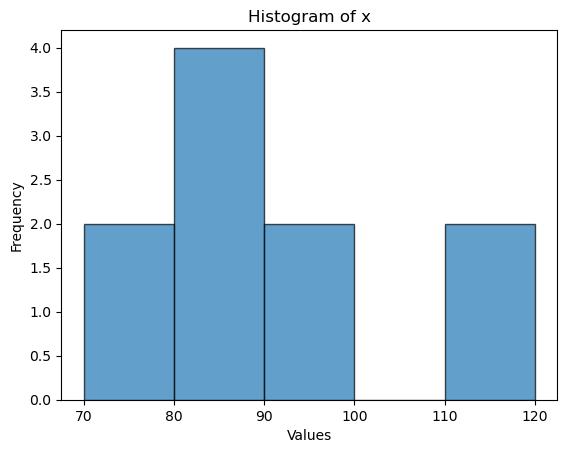

Median:  84.5
Variance:  209.29


In [102]:
# Data
x = np.array([77, 111, 71, 91, 116, 81, 83, 80, 86, 92])

# Define bins: start from 70, class size 10
bins = np.arange(70, x.max() + 10, 10)

# Create histogram
plt.hist(x, bins=bins, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title("Histogram of x")
plt.xlabel("Values")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

median = np.median(x)
print ("Median: ", median)

variance = np.var(x, ddof=1)
print ("Variance: ", round(variance,2))

# Solutions with Python by Pernille

Exercise I:

In [ ]:
# Solution (1)

mu0 = 18
mu_hat = 17
s = 4.5
n = 48
t_obs = (mu_hat-mu0)/(s/n**.5) 

print(t_obs)

print(stats.t.ppf(0.025, df = n-1))
print(stats.t.ppf(0.975, df = n-1))


-1.539600717839002
-2.011740510475755
2.0117405104757546


In [19]:
# solution (2)
n = 45
p_value = 2*stats.t.cdf(-1.74, df= n-1)
print(p_value)

0.08885012244793078


since the p-value is greater than 0.05 the conclusion is we do not reject the null hypothesis

In [20]:
# we could also compare with critical value
stats.t.ppf(0.025, df=n-1)

-2.0153675699129416

we see that the t_obs is less extreme than the critical value (accept H0)

Exercise II:

In [23]:
# solution (3)
mu_hat = 1.01
s = 0.09
n = 30

# we need CI for the standard deviation (book method 3.19)

chi2_0975 = stats.chi2.ppf(0.975, df=n-1)
lower = np.sqrt((n-1)*s**2/chi2_0975)

chi2_0025 = stats.chi2.ppf(0.025, df=n-1)
upper = np.sqrt((n-1)*s**2/chi2_0025)

print(lower, upper)

0.07167662394863719 0.12098836613164021


Exercise III:

In [ ]:
# solution (4)

# What is the probability P(X < 3)

# f(x) is discrete
# to calc F(X=2) = P(X <= 2) we sum the f(x) for x = 0,1,2

print(.17 + .22 + .28)

0.67


In [ ]:
# solution (5)

# The mean of X is 2.10. What is the variance of X?

x = np.array([0,1,2,3,4])
fx = np.array([.17, .22, .28, .0, .33])

# for sanity check calc mean:
print(np.sum(x*fx))

2.1


In [26]:
# now calc var:
print(np.sum((x-2.10)**2 *fx))

2.21


Exercise IV:

In [27]:
# solution (6)

print(250-252.5)

-2.5


In [31]:
# solution (7)
SSE = 915.92 - 480
SEM = SSE / (16-4)
print(SSE)
print(SEM)
print(SEM**.5)

435.91999999999996
36.32666666666666
6.0271607467087405


Exercise V:

In [35]:
# solution (8)

# PFOS concentrations
x = np.array([0, 0, 2, 2, 4, 4, 6, 6, 8, 8, 12, 12])
# SPETT values
y = np.array([16, 116, 1170, 841, 2287, 2012, 2653, 3333, 4270, 3999, 5750, 5407])

data8 = pd.DataFrame({'x': x, 'y': y})  
print(data8)

     x     y
0    0    16
1    0   116
2    2  1170
3    2   841
4    4  2287
5    4  2012
6    6  2653
7    6  3333
8    8  4270
9    8  3999
10  12  5750
11  12  5407


In [252]:
fit8 = smf.ols(formula = 'y ~ x', data=data8).fit()
print(fit8.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
No. Observations:                  12   F-statistic:                     608.4
Covariance Type:            nonrobust   Prob (F-statistic):           2.74e-10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    160.7286    125.745      1.278      0.230    -119.449     440.906
x            467.5821     18.957     24.666      0.000     425.344     509.821

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


c:\Users\pydni\AppData\Local\anaconda3\envs\pernille\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [38]:
# solution (10)
new_data = pd.DataFrame({'x': [7]})

pred = fit8.get_prediction(new_data).summary_frame(alpha=0.05)
print(pred)


          mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  3433.803571  81.168203    3252.949544    3614.657599   2829.041707   

   obs_ci_upper  
0   4038.565435  


Exercise VI:

In [42]:
# solution (11)
print(20/85)
lower = 20/85 - stats.norm.ppf(0.95)*np.sqrt(20/85*(1-20/85)/85)
upper = 20/85 + stats.norm.ppf(0.95)*np.sqrt(20/85*(1-20/85)/85)
print([lower, upper])

0.23529411764705882
[0.15961596112056983, 0.3109722741735478]


In [43]:
# solution (12)

p = 20/85

print(p*(1-p)/((0.1/(2*stats.norm.ppf(0.975)))**2))

276.4786971295425


Exercise VII:

In [45]:
# solution (13)

pre = np.array([41,46,35,49,33,42])
post = np.array([42,47,43,55,28,49])

In [ ]:
# 1)  stats.ttest_ind(pre.mean(), post.mean(), equal_var=False)

# 2)  stats.ttest_ind(post, pre, equal_var=True)

# 3)  stats.ttest_ind(pre, post, equal_var=False)

# 4)  stats.ttest_1samp(pre-post, popmean=0)

# 5)  stats.ttest_ind(pre.std(ddof=1), post.std(ddof=1), equal_var=False)

In [ ]:
# try the code (if you want to test that it works)
print(stats.ttest_ind(pre.mean(), post.mean(), equal_var=False))
print(stats.ttest_ind(post, pre, equal_var=True))
print(stats.ttest_ind(pre, post, equal_var=False))
print(stats.ttest_1samp(pre-post, popmean=0))
print(stats.ttest_ind(pre.std(ddof=1), post.std(ddof=1), equal_var=False))

answer is number 4 - a one sample test of the differences (equal to a parred test)

Exercise VIII:

In [58]:
# solution (14)

print(1 - stats.poisson.cdf(k=4, mu=2.5))

0.10882198108584873


In [59]:
# solution (15)

2.5*7

17.5

In [61]:
# solution (16)
print(stats.binom.pmf(k=5, n=5, p=0.78))

0.28871743680000006


Exercise IX:

In [253]:
# solution (17)

# length_cm.min()
# 3.06

# length_cm.max()
# 5.37

#  np.percentile(length_cm , [25, 50, 75], method=’averaged_inverted_cdf’) 
# 3.72 3.93 4.32

# length_cm.mean()
# 4.03

# length_cm.std(ddof=1)
# 0.49

In [204]:
np.random.seed(55)
simsamples = stats.norm.rvs(size=(10000,30), loc=4.03, scale=0.49)
sim_medians = np.median(simsamples,axis=1)
print(sim_medians)
print(np.percentile(sim_medians, [0.5, 99.5], method="averaged_inverted_cdf"))
print(np.quantile(sim_medians, [0.005, .995], method="averaged_inverted_cdf"))

[4.14695258 4.10146578 4.07560336 ... 4.15016382 4.08309909 4.17899033]
[3.76310071 4.3147543 ]
[3.76310071 4.3147543 ]


In [254]:
# (18)

# The following code was run:

# median_cm = 3.93
# mean_cm = 4.03
# sd_cm = 0.49
# n = len(length_cm)
# k = 10000

In [ ]:

# answers (in Python):

# 1)
# sim_samples = np.random.choice(length_cm, size=(k,n))
# sim_stats = np.quantile(sim_samples, p = 0.25, axis = 1, method = "avergaed_inverted_cdf")
# np.quantile(sim_stats, p = [0.005, 0.995], method="averaged_inverted_cdf")

# 2)
# sim_samples = stats.norm.rvs(loc = mean_cm, scale=sd_cm, size=(k,n))
# sim_stats = np.quantile(sim_samples, p = 0.25, axis = 1, method = "avergaed_inverted_cdf")
# np.quantile(sim_stats, p = [0.025, 0.975], method="averaged_inverted_cdf")

# 3)
# sim_samples = np.random.choice(length_cm, size=(k,n))
# sim_stats = np.quantile(sim_samples, p = 0.75, axis = 1, method = "avergaed_inverted_cdf")
# np.quantile(sim_stats, p = [0.01, 0.99], method="averaged_inverted_cdf")

# 4)
# sim_samples = stats.norm.rvs(loc = mean_cm, scale=sd_cm, size=(k,n))
# sim_stats = np.quantile(sim_samples, p = 0.75, axis = 1, method = "avergaed_inverted_cdf")
# np.quantile(sim_stats, p = [0.01, 0.99], method="averaged_inverted_cdf")

# 5)
# sim_samples = np.random.choice(length_cm, size=(k,n))
# sim_stats = np.quantile(sim_samples, p = 0.25, axis = 1, method = "avergaed_inverted_cdf")
# np.quantile(sim_stats, p = [0.025, 0.975], method="averaged_inverted_cdf")


# correct answer is 5

Exercise X:

In [220]:
# solution (19)

diff = 325 - 286
print(diff)

se_diff = np.sqrt((40**2 + 44**2)/12)
print(se_diff)

t_obs = diff/se_diff
print(t_obs)

39
17.165857586111645
2.2719517393383057


In [221]:
# df can be calculated with eqn 3-50 (page 162 in book)

df = ((40**2 + 44**2)/12)**2 / ((40**2/12)**2/(12-1) + (44**2/12)**2/(12-1))
print(df)

21.803132989732557


Exercise XI:

In [ ]:
# solution (20)

# use error propagation

# answer: 3

In [ ]:
# solution (21)

# out of scope

In [ ]:
# solution (22)

# answer is 3, but statement 1 could also be argued to be wrong

Exercise XII:

In [255]:
# output translated to python:

# fit = smf.ols(formula = 'efficiency ~ ph + catalyst', data = df).fit()
# print(fit.summary(slim=True))

# OLS Regression Results
# ==============================================================================
# Dep. Variable:                      y  R-squared:                        0.549
# Model:                            OLS  Adj. R-squared:                   0.496
# No. Observations:                  20  F-statistic:                      10.36
# Covariance Type:            nonrobust  Prob (F-statistic):            0.001145
# ==============================================================================
#                coef    std err         t       P>|t|      [0.025    0.975]
# ------------------------------------------------------------------------------
# Intercept    39.660     14.652     2.797       0.015          -        -
# ph           -4.059      1.532    -2.649       0.017          -        -
# catalyst      4.593      1.247     3.683       0.002          -        -
# ==============================================================================

# print(round(np.sqrt(fit.scale),2))
# 6.34

# print(fit.pvalues)
# Intercept     0.01496 
# ph            0.01687 
# catalyst      0.00184 

In [ ]:
# solution (23)

# Which of the following statements is correct, given a significance
# level of α = 1%?

# 1 □ The effect of catalyst on efficiency is not significant, because the p-value is less than 0.01.
# 2 □ The amount of catalyst have a significant effect on efficiency, while the pH does not.
# 3 □ Both the amount of catalyst and the pH are significant, because the p-values are less than
#     0.05.
# 4 □ Neither the amount of catalyst nor the pH are significant, because the p-values are less
#     than 0.05.
# 5 □ The model intercept is significant, because the p-value of 0.0150 is greater than 0.01.

# answer: 2 is correct (because we use alpha = 0.01!)

In [227]:
# solution (24)

# Look at the same output as above. What effect does an increase of two units of catalyst
# have on the expected hourly output assuming pH level is kept constant at 4?

# 1 □ The expected hourly output increases by 3.87 kg per hour.
# 2 □ The expected hourly output decreases by 4.06 kg per hour.
# 3 □ The expected hourly output increases by 4.59 kg per hour.
# 4 □ The expected hourly output increases by 9.19 kg per hour.
# 5 □ The expected hourly output remains constant.

print( 4.593 * 2)

9.186


In [ ]:
# answer: 4

Exercise XIII:

In [11]:
tbl = pd.DataFrame(np.array([[12, 14, 18, 5, 15],
                             [38, 35, 35, 42, 35]]), 
                   index=["Trace", "No Trace"],
                   columns=["A", "B", "C", "D", "E"])

print(tbl)

           A   B   C   D   E
Trace     12  14  18   5  15
No Trace  38  35  35  42  35


In [12]:
# solution (25)

chi2, p_val, dof, expected = stats.chi2_contingency(tbl, correction=False)

print(expected)


[[12.85140562 12.59437751 13.62248996 12.08032129 12.85140562]
 [37.14859438 36.40562249 39.37751004 34.91967871 37.14859438]]


In [ ]:
# answer: 39.377

In [235]:
# solution (26)

# rule of thumb for validity:
# " The rule of thumb is that it is valid when all
#   the computed expected values are at least 5: eij ≥ 5."
# page 289 in book

# we see from expected values that rule of thumb for validity is fulfilled

print([chi2, p_val])

[8.24929193000206, 0.08286151800665145]


In [236]:
# answer: 4

In [237]:
# solution (27)

tbl = pd.DataFrame(np.array([[25,  9, 19],
                             [23, 21, 23],
                             [28, 33, 19]]), 
                   index=["low", "med", "high"],
                   columns=["A", "B", "C"])

print(tbl)

       A   B   C
low   25   9  19
med   23  21  23
high  28  33  19


In [238]:
chi2, p_val, dof, expected = stats.chi2_contingency(tbl, correction=False)

In [239]:
print([chi2, p_val])

[9.575734721155486, 0.048214114523735675]


In [ ]:
# p < 0.05
# answer: 2

Exercise XIV:

In [241]:
# solution (28)

# the values can be computed via the p-values

F1 = stats.f.ppf(q=1-0.432, dfn = 5 , dfd = 5*4)
F2 = stats.f.ppf(q=1-0.036, dfn = 4 , dfd = 5*4)

print([F1, F2])


[1.0204431483931302, 3.1691421344428625]


In [ ]:
# answer F1 < F2, answer: 4

In [ ]:
# solution (29)

# answer: 5

In [ ]:
# solution (30)

# there must be 4+1 = 5 different hardware types

M = 5*4/2
print(M)

10.0


In [ ]:
# answer: 4